# MultiImagePlotter Demo with CIFAR10


# Prerequisites

In [1]:
import numpy as np
from pathlib import Path
from collections import Counter

import torch
from torchvision.datasets import CIFAR10, SVHN, MNIST, EMNIST

from hyperpyper.utils import IndexToClassLabelDecoder, ClassToIndexLabelDecoder, FileToClassLabelDecoder
from hyperpyper.utils import DataSetDumper, VisionDatasetDumper
from hyperpyper.utils import FolderScanner as fs
from hyperpyper.utils import MultiImagePlotter, MultiImageFilePlotter


random_state = 23

In [2]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print("Running on device:", DEVICE.upper())

Running on device: CUDA


In [3]:
ROOT_PATH = Path.home() / "Downloads" / "data"

DATA_PATH = ROOT_PATH / "CIFAR10"

DATA_PATH_TEST = Path(DATA_PATH, "test")
DATA_PATH_TRAIN = Path(DATA_PATH, "train")

## Create CIFAR10 dataset organized in subfolders indicating class
The VisionDatasetDumper handles the download and the creation of a folder structure where images are stored. They can then be used as the starting point for experiments. We only need the dataset returned by the VisionDatasetDumper to extract the class labels to be able to match them with class indices.

In [4]:
train_dataset = VisionDatasetDumper(CIFAR10, root=DATA_PATH, dst=DATA_PATH_TRAIN, train=True).dump()

Files already downloaded and verified


In [5]:
train_files = fs.get_files(DATA_PATH_TRAIN, extensions='.png', recursive=True)

len(train_files)

50000

In [6]:
import random

# Select a random item
selected_files = random.sample(train_files, 8)
selected_files

[WindowsPath('C:/Users/bernh/Downloads/data/CIFAR10/train/0/10690.png'),
 WindowsPath('C:/Users/bernh/Downloads/data/CIFAR10/train/5/27408.png'),
 WindowsPath('C:/Users/bernh/Downloads/data/CIFAR10/train/8/42617.png'),
 WindowsPath('C:/Users/bernh/Downloads/data/CIFAR10/train/6/3412.png'),
 WindowsPath('C:/Users/bernh/Downloads/data/CIFAR10/train/0/19492.png'),
 WindowsPath('C:/Users/bernh/Downloads/data/CIFAR10/train/4/10849.png'),
 WindowsPath('C:/Users/bernh/Downloads/data/CIFAR10/train/7/46792.png'),
 WindowsPath('C:/Users/bernh/Downloads/data/CIFAR10/train/3/46085.png')]

In [7]:
# Extract class indices from filenames
file_encoder = FileToClassLabelDecoder()
train_y = file_encoder(selected_files)

# Convert indices to class labels
label_decoder = IndexToClassLabelDecoder(train_dataset.classes)
train_y_str = label_decoder(train_y)

train_y_str

['airplane', 'dog', 'ship', 'frog', 'airplane', 'deer', 'horse', 'cat']

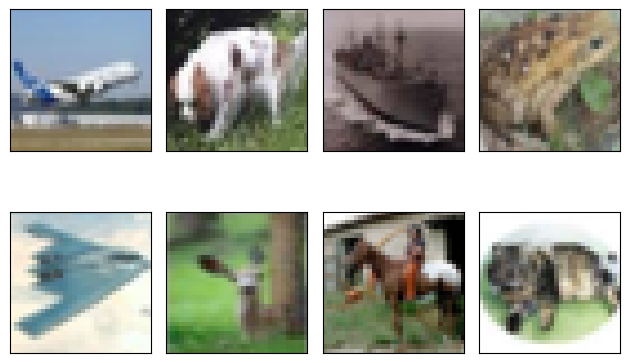

In [8]:
fig = MultiImageFilePlotter(selected_files).plot()

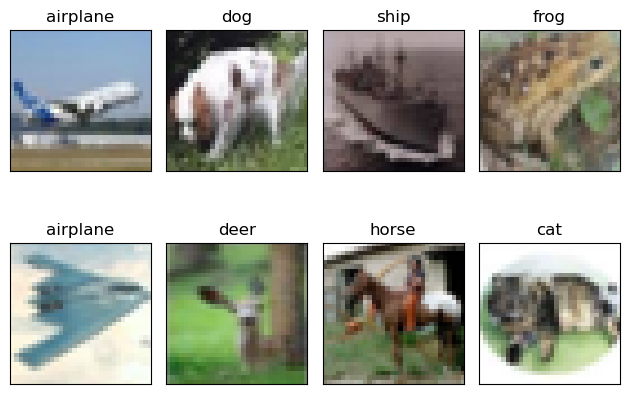

In [9]:
fig = MultiImageFilePlotter(selected_files, titles=train_y_str).plot()

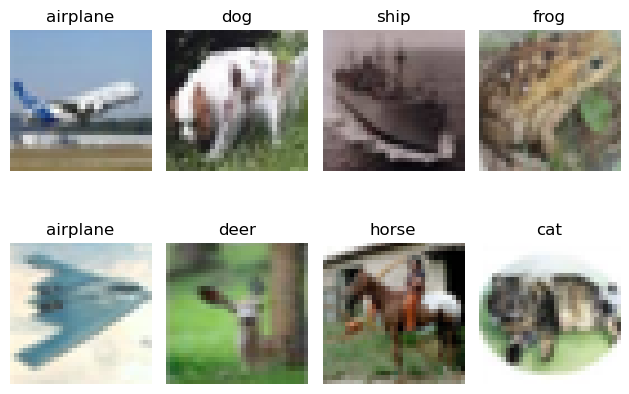

In [10]:
fig = MultiImageFilePlotter(selected_files, titles=train_y_str, frame=False).plot()

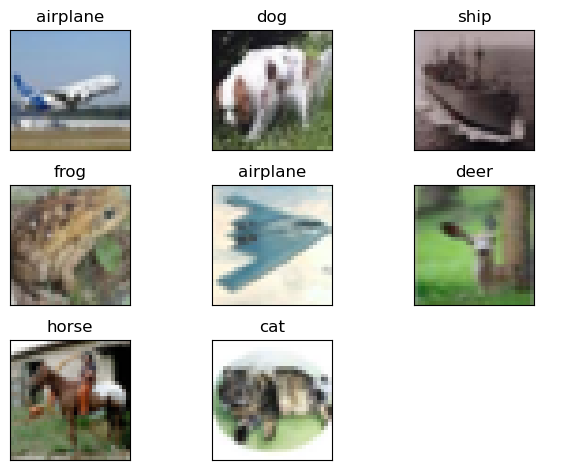

In [11]:
fig = MultiImageFilePlotter(selected_files, layout='grid', titles=train_y_str).plot()

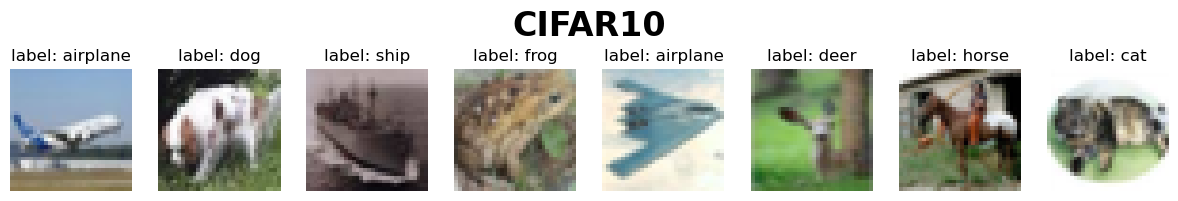

In [12]:
fig = MultiImageFilePlotter(selected_files,
                titles=train_y_str,
                title_prefix = 'label: ',
                layout = 'vector',
                frame = False,
                suptitle = "CIFAR10",
                suptitle_fontsize = 24,
                suptitle_fontweight = 'bold', 
                figsize = (12,2)).plot()

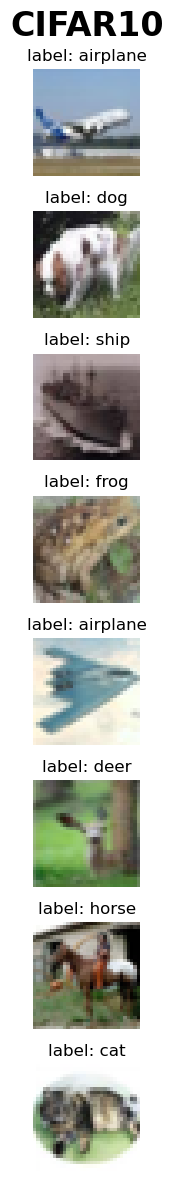

In [13]:
fig = MultiImageFilePlotter(selected_files,
                titles=train_y_str,
                title_prefix = 'label: ',
                layout = 'vector',
                rotate = True,
                frame = False,
                suptitle = "CIFAR10",
                suptitle_fontsize = 24,
                suptitle_fontweight = 'bold', 
                figsize = (3,12)).plot()